#### **Ejercicio:** Ejercicio de visualización de datos

**Elaborado por:** Fabian Villarreal Sosa

Makeover Monday ofrece un reto semanal de recrear o mejorar visualizaciones de datos. ¡Tu tarea es elegir uno de las visualizaciones de datos para recrear o mejorar!

https://www.makeovermonday.co.uk/

Para hacer esto:

1. Elegir un conjunto de datos de la Data Sets list. Puedes elegir un conjunto de datos reciente o uno del año anterior, ¡siempre y cuando te interese!
https://www.makeovermonday.co.uk/data/data-sets-2020/

2. Descarga los datos que elegiste.
3. Usa Python para crear una visualización informativa y placentera a la vista usando los datos que seleccionaste.

También necesitas **subir tu trabajo para esta tarea a GitHub**, ¡así todos pueden ver lo fabulosa que es la visualización que creaste!

Para hacer esto:

1. Crea un nuevo repositorio de GitHub con un nombre informativo para su visualización o datos. (Nota: aquí hay instrucciones de cómo hacerlo si no estás segur. Asegúrate de marcar la casilla «Inicie este repositorio con un README.»).
2. Agrega tu código al repositorio GitHub que creaste. Puedes hacerlo en Google Colab seleccionando Archivo > «Guardar una Copia en GitHub».
3. Edita el README para crear un resumen informativo de los ejercicios que explican el propósito de la tarea/visualización, los datos y qué muestra/dice la visualización que creaste. ¡También podrías querer incluir una imagen estática de tu visualización final en el README! (Nota: los README son archivos markdown. Aquí hay una hoja con soluciones de markdown syntax.) ¡Intenta hacerlo lo más informativo y profesional posible, ya que esto es lo primero que las personas verán cuando entren a tu repositorio GitHub!

### **Tema: 2021/W2: Gender Inequality in HIV Infections in Adolescents**

https://data.world/makeovermonday/2021w2

In [262]:
### Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [263]:
### Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
### Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

In [265]:
# Determinar cuál es la codificación de caracteres 
import chardet
with open('Jan 2021 Data - Viz5 Gender Inequality and HIVAIDS.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [266]:
### Cargar los datos
df=pd.read_csv('Jan 2021 Data - Viz5 Gender Inequality and HIVAIDS.csv', encoding='ISO-8859-1')
df.head()

,Country,UNICEF Region,Year,Sex,Age,Estimated incidence rate of new HIV infection per 1 000 uninfected population,Estimated number of annual AIDS related deaths,Estimated number of annual new HIV infections,Estimated number of people living with HIV,Estimated rate of annual AIDS related deaths per 100 000 population
0,Angola,Eastern and Southern Africa,1990,Female,Age 10-19,0.64,100.0,500.0,860,0.36
1,Angola,Eastern and Southern Africa,1990,Male,Age 10-19,0.15,100.0,100.0,200,0.07
2,Angola,Eastern and Southern Africa,1991,Female,Age 10-19,0.75,100.0,500.0,1100,0.42
3,Angola,Eastern and Southern Africa,1991,Male,Age 10-19,0.17,100.0,200.0,500,0.14
4,Angola,Eastern and Southern Africa,1992,Female,Age 10-19,0.88,100.0,590.0,1300,0.54


In [267]:
### Ver grupos de la poblacion por rango de edad
df['Age'].value_counts()

Age 10-19    2640
Name: Age, dtype: int64

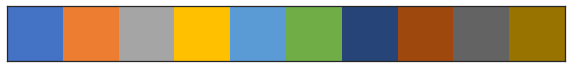

In [268]:
### Estilo de los graficos
sns.set_style('white')

### Paleta de colores Excel
my_palette=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Colores de Microsoft Excel
sns.palplot(sns.color_palette(my_palette, 10))

### Definir paleta
sns.set_palette(my_palette)

In [269]:
### Número estimado de muertes anuales relacionadas con el SIDA por año
df1=df.groupby(['Year', 'Sex'])[['Estimated number of annual AIDS related deaths']].sum()
df1=df1.reset_index() # Resetear indice
df1.head()

,Year,Sex,Estimated number of annual AIDS related deaths
0,1990,Female,6000.0
1,1990,Male,4300.0
2,1991,Female,6100.0
3,1991,Male,4400.0
4,1992,Female,7400.0


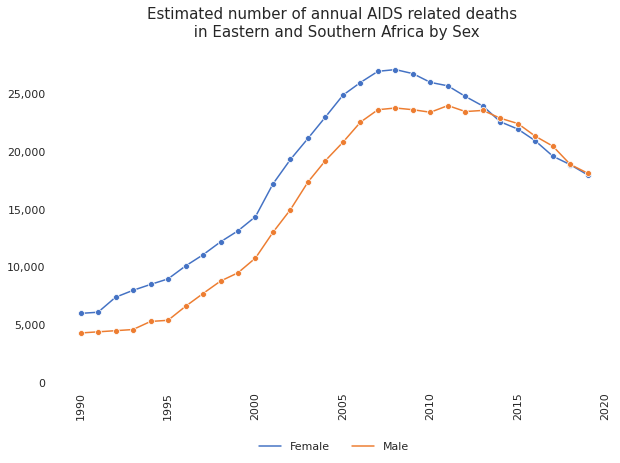

In [270]:
### Ver: Número estimado de muertes anuales relacionadas con el SIDA
plt.figure(figsize=(10, 6))
p1=sns.lineplot(data=df1, 
                x='Year', y='Estimated number of annual AIDS related deaths', hue='Sex', marker='o')
plt.title('Estimated number of annual AIDS related deaths \n in Eastern and Southern Africa by Sex', fontsize=15, pad=20)
plt.legend(title=None, 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.15), 
           ncol=2,
           frameon=False)
plt.ylabel('')
plt.yticks(np.arange(0, max(df1['Estimated number of annual AIDS related deaths'])+1, 5000))
plt.xlabel('') # labelpad=15
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks());

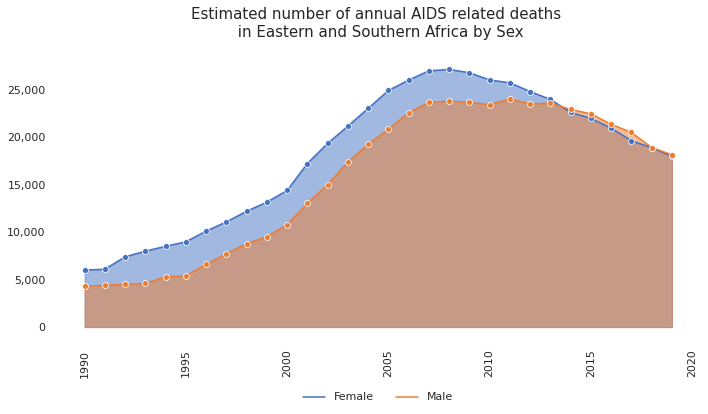

In [271]:
### Ver: Número estimado de muertes anuales relacionadas con el SIDA
### Agregar relleno debajo de las curvas

plt.figure(figsize=(10, 6))
p1=sns.lineplot(data=df1, 
                x='Year', y='Estimated number of annual AIDS related deaths', hue='Sex', marker='o')
plt.fill_between(x=df1['Year'].unique(), 
                 y1=df1[df1['Sex']=='Female']['Estimated number of annual AIDS related deaths'],
                 y2=0,
                 interpolate=True,
                 color=my_palette[0],
                 alpha=0.5)
plt.fill_between(x=df1['Year'].unique(),
                 y1=df1[df1['Sex']=='Male']['Estimated number of annual AIDS related deaths'],
                 y2=0,
                 interpolate=True,
                 color=my_palette[1],
                 alpha=0.5)
plt.title('Estimated number of annual AIDS related deaths \n in Eastern and Southern Africa by Sex', fontsize=15, pad=20)
plt.legend(title=None, 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.15), 
           ncol=2,
           frameon=False)
plt.ylabel('')
plt.yticks(np.arange(0, max(df1['Estimated number of annual AIDS related deaths'])+1, 5000))
plt.xlabel('') # labelpad=15
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks());

# Guardar grafico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Coding Dojo/Week3_Python for Data Visualization/Deberes/annual_AIDS_related_deaths.png', dpi=300) # Este metodo sirve para guardar, ver en la carpeta de guardado

In [272]:
### Número estimado de personas que viven con el VIH por año
df2=df.groupby(['Year', 'Sex'])[['Estimated number of people living with HIV']].sum()
df2=df2.reset_index()
df2.head()

,Year,Sex,Estimated number of people living with HIV
0,1990,Female,349070
1,1990,Male,87240
2,1991,Female,414890
3,1991,Male,99680
4,1992,Female,478190


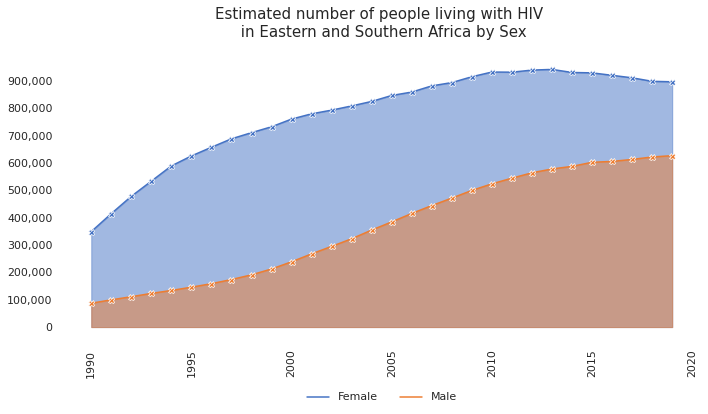

In [273]:
### Ver: Número estimado de personas que viven con el VIH 

plt.figure(figsize=(10, 6))
p2=sns.lineplot(data=df2,
                x='Year', y='Estimated number of people living with HIV', hue='Sex', marker='X')
plt.fill_between(x=df2['Year'].unique(),
                 y1=df2[df2['Sex']=='Female']['Estimated number of people living with HIV'],
                 y2=0,
                 interpolate=True,
                 color=my_palette[0],
                 alpha=0.5)
plt.fill_between(x=df2['Year'].unique(),
                 y1=df2[df2['Sex']=='Male']['Estimated number of people living with HIV'],
                 y2=0,
                 interpolate=True,
                 color=my_palette[1],
                 alpha=0.5)
plt.title('Estimated number of people living with HIV \n in Eastern and Southern Africa by Sex', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=False)
plt.ylabel('')
plt.yticks(np.arange(0, max(df2['Estimated number of people living with HIV'])+1, 100000))
plt.xlabel('')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
p2.set_yticklabels('{:,.0f}'.format(x) for x in p2.get_yticks());

# Guardar grafico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Coding Dojo/Week3_Python for Data Visualization/Deberes/people_living_with_HIV.png', dpi=300) # Este metodo sirve para guardar, ver en la carpeta de guardado